In [22]:
from scipy.interpolate import (
    LinearNDInterpolator,
    NearestNDInterpolator,
    CloughTocher2DInterpolator,
    Rbf,
)

import matplotlib.pyplot as plt
import firedrake
import firedrake_adjoint

from firedrake import Constant, cos, sin

import numpy as np
from numpy import pi as π
from numpy import random

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os

currentdir = os.path.dirname(os.path.realpath('__file__'))

/Applications/firedrake/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
mesh = firedrake.UnitSquareMesh(32, 32)

# Solution Space
V = firedrake.FunctionSpace(mesh, family='CG', degree=2)

# q (Control) Space
Q = firedrake.FunctionSpace(mesh, family='CG', degree=2)

/Applications/firedrake/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:

seed = 1729
generator = random.default_rng(seed)

degree = 5
x = firedrake.SpatialCoordinate(mesh)

q_true = firedrake.Function(Q, name='q_true')
for k in range(degree):
    for l in range(int(np.sqrt(degree**2 - k**2))):
        Z = np.sqrt(1 + k**2 + l**2)
        ϕ = 2 * π * (k * x[0] + l * x[1])

        A_kl = generator.standard_normal() / Z
        B_kl = generator.standard_normal() / Z

        expr = Constant(A_kl) * cos(ϕ) + Constant(B_kl) * sin(ϕ)
        mode = firedrake.interpolate(expr, Q)

        q_true += mode

print('Made fake q_true')


/Applications/firedrake/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/transform/iname.py:1100: DeprecationWarning: passing 'use_boostable_into=False' to 'get_iname_duplication_options' is deprecated. The argument will go away in 2021.
  return not bool(next(get_iname_duplication_options(kernel), False))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  ret

/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x

/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/transform/iname.py:1100: DeprecationWarning: passing 'use_boostable_into=False' to 'get_iname_duplication_options' is deprecated. The argument will go away in 2021.
  return not bool(next(get_iname_duplication_op

/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x

/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/transform/iname.py:1100: 

/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x

/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/transform/iname.py:1100: DeprecationWarning: passing 'use_boostable_into=False' to 'get_iname_duplication_options' is deprecated. The argument will go away in 2021.
  return not bool(next(get_iname_duplication_op

/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x

/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/transform/iname.py:1100: 

/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKe

/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x

/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/transform/iname.py:1100: 

/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x

/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/transform/iname.py:1100: 

Made fake q_true


In [25]:
from firedrake import exp, inner, grad, dx
u_true = firedrake.Function(V, name='u_true')
v = firedrake.TestFunction(V)
f = Constant(1.0)
k0 = Constant(0.5)
bc = firedrake.DirichletBC(V, 0, 'on_boundary')
F = (k0 * exp(q_true) * inner(grad(u_true), grad(v)) - f * v) * dx
firedrake.solve(F == 0, u_true, bc)

print('Made fake u_true')

/Applications/firedrake/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning: Call get_access_map(...).range() instead. Will be removed in 2022.x
  return get_access_range(domain, subscript)
/Applications/firedrake/src/loopy/loopy/check.py:480: DeprecationWarning

/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKe

/Applications/firedrake/src/loopy/loopy/codegen/__init__.py:477: DeprecationWarning: 'KernelState.SCHEDULED' is deprecated. Use 'KernelState.LINEARIZED'.
  if kernel.state != KernelState.SCHEDULED:
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecated. Use 'LoopKernel.linearization'.
  return self.__class__(**self.get_copy_kwargs(**kwargs))
/Applications/firedrake/lib/python3.9/site-packages/pytools/__init__.py:367: DeprecationWarning: 'LoopKernel.schedule' is deprecat

Made fake u_true


In [26]:
# Clear tape since don't need to have taped above
tape = firedrake_adjoint.get_working_tape()
tape.clear_tape()

/Applications/firedrake/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
filename = os.path.join(currentdir, 'true-fields')

with firedrake.DumbCheckpoint(filename, mode=firedrake.FILE_CREATE) as chk:
    chk.store(q_true)
    chk.store(u_true)

/Applications/firedrake/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:

with firedrake.DumbCheckpoint(filename, mode=firedrake.FILE_READ) as chk:
    chk.load(q_true, name='q_true')
    chk.load(u_true, name='u_true')

/Applications/firedrake/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Applications/firedrake/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


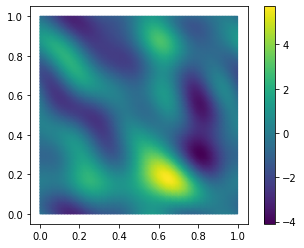

In [29]:
fig, axes = plt.subplots()
axes.set_aspect('equal')
colors = firedrake.tripcolor(q_true, axes=axes, shading='gouraud')
fig.colorbar(colors);

/Applications/firedrake/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


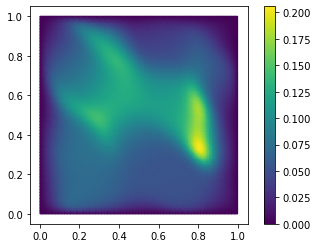

In [30]:
fig, axes = plt.subplots()
axes.set_aspect('equal')
colors = firedrake.tripcolor(u_true, axes=axes, shading='gouraud')
fig.colorbar(colors);